## The fifth In-class-exercise (2/23/2021, 20 points in total)

In exercise-03, I asked you to collected 500 textual data based on your own information needs (If you didn't collect the textual data, you should recollect for this exercise). Now we need to think about how to represent the textual data for text classification. In this exercise, you are required to select 10 types of features (10 types of features but absolutely more than 10 features) in the followings feature list, then represent the 500 texts with these features. The output should be in the following format:
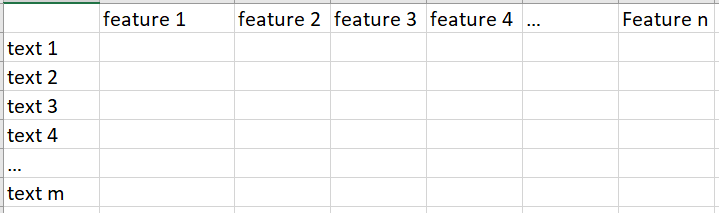

The feature list:

* (1) tf-idf features
* (2) POS-tag features: number of adjective, adverb, auxiliary, punctuation, complementizer, coordinating conjunction, subordinating conjunction, determiner, interjection, noun, possessor, preposition, pronoun, quantifier, verb, and other. (select some of them if you use pos-tag features)
* (3) Linguistic features:
  * number of right-branching nodes across all constituent types
  * number of right-branching nodes for NPs only
  * number of left-branching nodes across all constituent types
  * number of left-branching nodes for NPs only
  * number of premodifiers across all constituent types
  * number of premodifiers within NPs only
  * number of postmodifiers across all constituent types
  * number of postmodifiers within NPs only
  * branching index across all constituent types, i.e. the number of right-branching nodes minus number of left-branching nodes
  * branching index for NPs only
  * branching weight index: number of tokens covered by right-branching nodes minus number of tokens covered by left-branching nodes across all categories
  * branching weight index for NPs only 
  * modification index, i.e. the number of premodifiers minus the number of postmodifiers across all categories
  * modification index for NPs only
  * modification weight index: length in tokens of all premodifiers minus length in tokens of all postmodifiers across all categories
  * modification weight index for NPs only
  * coordination balance, i.e. the maximal length difference in coordinated constituents
  
  * density (density can be calculated using the ratio of folowing function words to content words) of determiners/quantifiers
  * density of pronouns
  * density of prepositions
  * density of punctuation marks, specifically commas and semicolons
  * density of auxiliary verbs
  * density of conjunctions
  * density of different pronoun types: Wh, 1st, 2nd, and 3rd person pronouns
  
  * maximal and average NP length
  * maximal and average AJP length
  * maximal and average PP length
  * maximal and average AVP length
  * sentence length

* Other features in your mind (ie., pre-defined patterns)

In [1]:
#Firstly we are trying to get the required libraries for parsing
from bs4 import BeautifulSoup
import requests
import re
url = 'http://www.imdb.com/chart/top'
#we are sending request to the url and saving the response in page
response = requests.get(url)
# here we are creating beautiful soup object and specifying parsing we want to use
# this gives the visual represntation of the file for better understanding
soup = BeautifulSoup(response.text, 'lxml')
print(soup.prettify())
#trying to extract the information using get function by looking at html output
movies = soup.select('td.titleColumn')
links = [a.attrs.get('href') for a in soup.select('td.titleColumn a')]
crew = [a.attrs.get('title') for a in soup.select('td.titleColumn a')]
ratings = [b.attrs.get('data-value') for b in soup.select('td.posterColumn span[name=ir]')]
votes = [b.attrs.get('data-value') for b in soup.select('td.ratingColumn strong')]
#saving the text collected from above 
#initiate a list and save the collected information
imdb = []
#we have used for loop to store the elements in dictionary
for index in range(0, len(movies)):
#we have title year place together so we have seperated using re module operations
    movie_string = movies[index].get_text()
    movie = (' '.join(movie_string.split()).replace('.', ''))
    movie_title = movie[len(str(index))+1:-7]
    year = re.search('\((.*?)\)', movie_string).group(1)
    place = movie[:len(str(index))-(len(movie))]
    data = {"movie_title": movie_title,
            "year": year,
            "place": place,
            "star_cast": crew[index],
            "rating": ratings[index],
            
            "link": links[index]}
    imdb.append(data)
#using for loop to print movie title with ratings and respective components
for item in imdb:
    print(item['place'], '-', item['movie_title'], '('+item['year']+') -', 'Starring:', item['star_cast'], '-' ,'Rating:', item['rating'], 'Link:', item['link'])

<!DOCTYPE html>
<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="app-id=342792525, app-argument=imdb:///?src=mdot" name="apple-itunes-app"/>
  <style>
   body#styleguide-v2 {
                    background: no-repeat fixed center top #000;
                }
  </style>
  <script type="text/javascript">
   var IMDbTimer={starttime: new Date().getTime(),pt:'java'};
  </script>
  <script>
   if (typeof uet == 'function') {
      uet("bb", "LoadTitle", {wb: 1});
    }
  </script>
  <script>
   (function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);
  </script>
  <title>
   IMDb Top 250 - IMDb
  </title>
  <script>
   (function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);
  </script>
  <script>
   if (typeof uet == 'function') {
      uet("be", "LoadTitle", {w

1 - The Shawshank Redemption (1994) - Starring: Frank Darabont (dir.), Tim Robbins, Morgan Freeman - Rating: 9.22359545999786 Link: /title/tt0111161/
2 - The Godfather (1972) - Starring: Francis Ford Coppola (dir.), Marlon Brando, Al Pacino - Rating: 9.147972751574525 Link: /title/tt0068646/
3 - The Godfather: Part II (1974) - Starring: Francis Ford Coppola (dir.), Al Pacino, Robert De Niro - Rating: 8.98024495785019 Link: /title/tt0071562/
4 - The Dark Knight (2008) - Starring: Christopher Nolan (dir.), Christian Bale, Heath Ledger - Rating: 8.974760694227063 Link: /title/tt0468569/
5 - 12 Angry Men (1957) - Starring: Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb - Rating: 8.934384631793943 Link: /title/tt0050083/
6 - Schindler's List (1993) - Starring: Steven Spielberg (dir.), Liam Neeson, Ralph Fiennes - Rating: 8.909730634482637 Link: /title/tt0108052/
7 - The Lord of the Rings: The Return of the King (2003) - Starring: Peter Jackson (dir.), Elijah Wood, Viggo Mortensen - Rating: 8

150 - Dial M for Murder (1954) - Starring: Alfred Hitchcock (dir.), Ray Milland, Grace Kelly - Rating: 8.132418976092637 Link: /title/tt0046912/
151 - Three Billboards Outside Ebbing, Missouri (2017) - Starring: Martin McDonagh (dir.), Frances McDormand, Woody Harrelson - Rating: 8.130352889683165 Link: /title/tt5027774/
152 - Shutter Island (2010) - Starring: Martin Scorsese (dir.), Leonardo DiCaprio, Emily Mortimer - Rating: 8.129886971781742 Link: /title/tt1130884/
153 - The Gold Rush (1925) - Starring: Charles Chaplin (dir.), Charles Chaplin, Mack Swain - Rating: 8.126503465005229 Link: /title/tt0015864/
154 - Chinatown (1974) - Starring: Roman Polanski (dir.), Jack Nicholson, Faye Dunaway - Rating: 8.126176356691037 Link: /title/tt0071315/
155 - Babam ve Oglum (2005) - Starring: Çagan Irmak (dir.), Eser Sariyar, Çetin Tekindor - Rating: 8.125388015704237 Link: /title/tt0476735/
156 - No Country for Old Men (2007) - Starring: Ethan Coen (dir.), Tommy Lee Jones, Javier Bardem - Rati

In [2]:
#now extracting information into csv
import csv
#include a file name
filename = 'C:\\Users\\14696\\Documents\\Datascience\\5731\\top_rated_movies.csv'
#we are using write as we are writing into the file
with open(filename, 'w', newline='') as f: 
    w = csv.DictWriter(f,['movie_title','year','star_cast','rating','link','place']) 
    w.writeheader() 
    for item in imdb:
        w.writerow(item)

In [11]:
import pandas as pd

In [32]:
# reading the CSV file and print the contents
csvFile = pd.read_csv("C:\\Users\\14696\\OneDrive\\Documents\\top_rated_movies.csv",encoding='latin-1') 
print(csvFile)

                   movie_title  year  \
0     The Shawshank Redemption  1994   
1                The Godfather  1972   
2       The Godfather: Part II  1974   
3              The Dark Knight  2008   
4                 12 Angry Men  1957   
..                         ...   ...   
245        The Invisible Guest  2016   
246  A Silent Voice: The Movie  2016   
247      The Battle of Algiers  1966   
248                   The Help  2011   
249          Three Colors: Red  1994   

                                             star_cast    rating  \
0    Frank Darabont (dir.), Tim Robbins, Morgan Fre...  9.223595   
1    Francis Ford Coppola (dir.), Marlon Brando, Al...  9.147973   
2    Francis Ford Coppola (dir.), Al Pacino, Robert...  8.980245   
3    Christopher Nolan (dir.), Christian Bale, Heat...  8.974761   
4        Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb  8.934385   
..                                                 ...       ...   
245       Oriol Paulo (dir.), Mario Casas, 

In [36]:
#printing the top 5 rows of table and getting size(row*columns) of table
dat = pd.read_csv("C:\\Users\\14696\\OneDrive\\Documents\\top_rated_movies.csv",encoding='latin-1')
print(dat.shape)
dat.head()

(250, 6)


,movie_title,year,star_cast,rating,link,place
0,The Shawshank Redemption,1994,"Frank Darabont (dir.), Tim Robbins, Morgan Fre...",9.223595,/title/tt0111161/,1
1,The Godfather,1972,"Francis Ford Coppola (dir.), Marlon Brando, Al...",9.147973,/title/tt0068646/,2
2,The Godfather: Part II,1974,"Francis Ford Coppola (dir.), Al Pacino, Robert...",8.980245,/title/tt0071562/,3
3,The Dark Knight,2008,"Christopher Nolan (dir.), Christian Bale, Heat...",8.974761,/title/tt0468569/,4
4,12 Angry Men,1957,"Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb",8.934385,/title/tt0050083/,5


In [37]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
# tokenize and build vocab
vectorizer.fit(dat)
# summarize
print(vectorizer.vocabulary_)
# encode document
vector = vectorizer.transform(dat)
# summarize encoded vector
print(vector.toarray())

{'movie_title': 1, 'year': 5, 'star_cast': 4, 'rating': 3, 'link': 0, 'place': 2}
[[0 1 0 0 0 0]
 [0 0 0 0 0 1]
 [0 0 0 0 1 0]
 [0 0 0 1 0 0]
 [1 0 0 0 0 0]
 [0 0 1 0 0 0]]


In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
# create the transform
vectorizer = TfidfVectorizer()
# tokenize and build vocab
vectorizer.fit(dat)
# summarize
print(vectorizer.vocabulary_)
print(vectorizer.idf_)
# encode document
vector = vectorizer.transform(dat)
# summarize encoded vector
print(vector.toarray())

{'movie_title': 1, 'year': 5, 'star_cast': 4, 'rating': 3, 'link': 0, 'place': 2}
[2.25276297 2.25276297 2.25276297 2.25276297 2.25276297 2.25276297]
[[0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]


In [39]:
from sklearn.feature_extraction.text import HashingVectorizer
vectorizer = HashingVectorizer(n_features=50)
# encode document
vector = vectorizer.transform(dat)
# summarize encoded vector
print(vector.shape)
print(vector.toarray())

(6, 50)
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0

In [41]:
file = open("C:\\Users\\14696\\OneDrive\\Documents\\top_rated_movies.csv")
reader = csv.reader(file)

In [44]:
data = [
    [(word.replace(",", "")
          .replace(".", "")
          .replace("(", "")
          .replace(")", ""))
    for word in row[2].lower().split()]
    for row in reader]

#Removes header
data = data[1:]

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer
v = TfidfVectorizer()
x = v.fit_transform(dat)#['movie_title'])

In [48]:
x.toarray()

array([[0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.]])

In [52]:
tf1 = (dat['movie_title'][0:250]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
tf1.columns = ['words','tf']
tf1

,words,tf
0,The,55.0
1,Redemption,1.0
2,Shawshank,1.0
3,Godfather,1.0
4,Part,2.0
...,...,...
483,Battle,1.0
484,Algiers,1.0
485,Help,1.0
486,Colors:,1.0


In [53]:
import numpy as np
for i,word in enumerate(tf1['words']):
  tf1.loc[i, 'idf'] = np.log(dat.shape[0]/(len(dat[dat['movie_title'].str.contains(word)])))
tf1

,words,tf,idf
0,The,55.0,1.551169
1,Redemption,1.0,5.521461
2,Shawshank,1.0,5.521461
3,Godfather,1.0,4.828314
4,Part,2.0,4.828314
...,...,...,...
483,Battle,1.0,5.521461
484,Algiers,1.0,5.521461
485,Help,1.0,5.521461
486,Colors:,1.0,5.521461


In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word',
 stop_words= 'english',ngram_range=(1,1))
train_vect = tfidf.fit_transform(dat['movie_title'])
train_vect

<250x409 sparse matrix of type '<class 'numpy.float64'>'
	with 460 stored elements in Compressed Sparse Row format>

In [55]:
from sklearn.feature_extraction.text import CountVectorizer
bow = CountVectorizer(max_features=1000, lowercase=True, ngram_range=(1,1),analyzer = "word")
train_bow = bow.fit_transform(dat['movie_title'])
train_bow

<250x464 sparse matrix of type '<class 'numpy.int64'>'
	with 656 stored elements in Compressed Sparse Row format>

In [56]:
import nltk
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import word_tokenize
nltk.download('punkt')
try1=[]
for i in dat['movie_title']:
  text = word_tokenize(i)
  try1.append(nltk.pos_tag(text))

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\14696\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\14696\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [57]:
c_nn=0
c_vb=0

for i in try1:
  for j,k in i:
    
    if k=="NN":
      c_nn+=1
    if k=="JJ":
      c_vb+=1

In [58]:
print(c_nn)
print(c_vb)

100
22


In [60]:
def number_of_cast(row):
    return len(row["star_cast"])

def number_of_links(row):
    return len(row["link"])

def number_of_movie(row):
    return len(row["movie_title"])

def clean_text(row):
    clean = row["movie_title"]

    
    #only remove the # symbol
    clean = clean.replace("#", "").replace("/", "").replace("(", "").replace(")", "")
    
    return clean.strip()



dat["number_of_cast"] = dat.apply(lambda row: number_of_cast(row), axis = 1)
dat["number_of_links"] = dat.apply(lambda row: number_of_links(row), axis = 1)
dat["number_of_movie"] = dat.apply(lambda row: number_of_movie(row), axis = 1)

dat["clean_text"] = dat.apply(lambda row: clean_text(row), axis = 1)
dat.sample(250)

,movie_title,year,star_cast,rating,link,place,number_of_cast,number_of_links,number_of_movie,clean_text
144,"Lock, Stock and Two Smoking Barrels",1998,"Guy Ritchie (dir.), Jason Flemyng, Dexter Flet...",8.145598,/title/tt0120735/,145,50,17,35,"Lock, Stock and Two Smoking Barrels"
125,Die Hard,1988,"John McTiernan (dir.), Bruce Willis, Alan Rickman",8.193287,/title/tt0095016/,126,49,17,8,Die Hard
34,The Pianist,2002,"Roman Polanski (dir.), Adrien Brody, Thomas Kr...",8.488838,/title/tt0253474/,35,55,17,11,The Pianist
193,Raatchasan,2018,"Ram Kumar (dir.), Vishnu Vishal, Amala Paul",8.074486,/title/tt7060344/,194,43,17,10,Raatchasan
64,Sunset Blvd,1950,"Billy Wilder (dir.), William Holden, Gloria Sw...",8.359756,/title/tt0043014/,65,51,17,11,Sunset Blvd
...,...,...,...,...,...,...,...,...,...,...
104,A Clockwork Orange,1971,"Stanley Kubrick (dir.), Malcolm McDowell, Patr...",8.241413,/title/tt0066921/,105,55,17,18,A Clockwork Orange
28,Interstellar,2014,"Christopher Nolan (dir.), Matthew McConaughey,...",8.536147,/title/tt0816692/,29,60,17,12,Interstellar
186,Before Sunrise,1995,"Richard Linklater (dir.), Ethan Hawke, Julie D...",8.083054,/title/tt0112471/,187,50,17,14,Before Sunrise
142,There Will Be Blood,2007,"Paul Thomas Anderson (dir.), Daniel Day-Lewis,...",8.148876,/title/tt0469494/,143,56,17,19,There Will Be Blood


In [61]:
from nltk.tokenize import word_tokenize

def get_tokens(row):
    return word_tokenize(row["clean_text"].lower())

dat["tokens"] = dat.apply(lambda row: get_tokens(row), axis = 1)
dat.sample(5, random_state = 4)

,movie_title,year,star_cast,rating,link,place,number_of_cast,number_of_links,number_of_movie,clean_text,tokens
33,The Lion King,1994,"Roger Allers (dir.), Matthew Broderick, Jeremy...",8.491924,/title/tt0110357/,34,52,17,13,The Lion King,"[the, lion, king]"
213,Hachi: A Dog's Tale,2009,"Lasse Hallström (dir.), Richard Gere, Joan Allen",8.052647,/title/tt1028532/,214,48,17,19,Hachi: A Dog's Tale,"[hachi, :, a, dog, 's, tale]"
39,Gladiator,2000,"Ridley Scott (dir.), Russell Crowe, Joaquin Ph...",8.476964,/title/tt0172495/,40,51,17,9,Gladiator,[gladiator]
6,The Lord of the Rings: The Return of the King,2003,"Peter Jackson (dir.), Elijah Wood, Viggo Morte...",8.886533,/title/tt0167260/,7,50,17,45,The Lord of the Rings: The Return of the King,"[the, lord, of, the, rings, :, the, return, of..."
101,Come and See,1985,"Elem Klimov (dir.), Aleksey Kravchenko, Olga M...",8.243470,/title/tt0091251/,102,53,17,12,Come and See,"[come, and, see]"


In [62]:
s = ["of", "in", "the", "A"]

def get_postags(row):
    
    postags = nltk.pos_tag(row["tokens"])
    list_classes = list()
    for  word in postags:
        list_classes.append(word[1])
    
    return list_classes

dat["postags"] = dat.apply(lambda row: get_postags(row), axis = 1)
dat.sample(5, random_state = 4)

,movie_title,year,star_cast,rating,link,place,number_of_cast,number_of_links,number_of_movie,clean_text,tokens,postags
33,The Lion King,1994,"Roger Allers (dir.), Matthew Broderick, Jeremy...",8.491924,/title/tt0110357/,34,52,17,13,The Lion King,"[the, lion, king]","[DT, NN, NN]"
213,Hachi: A Dog's Tale,2009,"Lasse Hallström (dir.), Richard Gere, Joan Allen",8.052647,/title/tt1028532/,214,48,17,19,Hachi: A Dog's Tale,"[hachi, :, a, dog, 's, tale]","[NN, :, DT, NN, POS, NN]"
39,Gladiator,2000,"Ridley Scott (dir.), Russell Crowe, Joaquin Ph...",8.476964,/title/tt0172495/,40,51,17,9,Gladiator,[gladiator],[NN]
6,The Lord of the Rings: The Return of the King,2003,"Peter Jackson (dir.), Elijah Wood, Viggo Morte...",8.886533,/title/tt0167260/,7,50,17,45,The Lord of the Rings: The Return of the King,"[the, lord, of, the, rings, :, the, return, of...","[DT, NN, IN, DT, NNS, :, DT, NN, IN, DT, NN]"
101,Come and See,1985,"Elem Klimov (dir.), Aleksey Kravchenko, Olga M...",8.243470,/title/tt0091251/,102,53,17,12,Come and See,"[come, and, see]","[NN, CC, VB]"
